In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [3]:
from scipy.stats import norm

In [4]:
import glob
import os
import pandas as pd
import numpy as np

from utils.datatools import * # getPatientsTable()
from utils.viztools import *  # plotPatientLRZDiff(patient, FWdata)

In [5]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
STDPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(STDPATH, "Controls")
PD_PATH = os.path.join(STDPATH, "PD")

FIGPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD_result_viz/"
FIG_CONTROL = os.path.join(FIGPATH, "Controls")
FIG_PD = os.path.join(FIGPATH, "PD")

In [6]:
patients = getPatientsTable()
# patients.head()
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


In [7]:
error = pd.read_csv(os.path.join(PHASEPATH, "error.csv"))
error = error[error["FW_BW"] == "FW"]
CONTROL_ERROR = error[error["Category"] == "Controls"]
PD_ERROR = error[error["Category"] == "PD"]
print("Controls error patient count:", len(CONTROL_ERROR))
print("PD error patient count:", len(PD_ERROR))

Controls error patient count: 1
PD error patient count: 10


In [8]:
patients.head()

,Patient,Category,cntFW,cntBW
0,BHY,Controls,3,3
1,CHH,Controls,3,3
2,HSH,Controls,3,3
3,JHY,Controls,3,3
4,JJG,Controls,3,3


In [9]:
LH_RH_SUB_CONTROL = []
LH_RH_DIFF_SUB_CONTROL = []
for PATIENT in CONTROL["Patient"].values:
    results = glob.glob(os.path.join(FIG_CONTROL, f"{PATIENT}*.npy"))
    
    for target in results:
        LH, RH, LH_DIFF, RH_DIFF = np.load(target)
        
        LH_RH_SUB_CONTROL.append(LH - RH)
        LH_RH_DIFF_SUB_CONTROL.append(LH_DIFF - RH_DIFF)

In [12]:
LH_RH_SUB_PD = []
LH_RH_DIFF_SUB_PD = []
for PATIENT in PD["Patient"].values:
    results = glob.glob(os.path.join(FIG_PD, f"{PATIENT}*.npy"))
    
    for target in results:
        LH, RH, LH_DIFF, RH_DIFF = np.load(target)
        
        LH_RH_SUB_PD.append(LH - RH)
        LH_RH_DIFF_SUB_PD.append(LH_DIFF - RH_DIFF)

---

Text(0.5, 0.95, 'LH RH SUB')

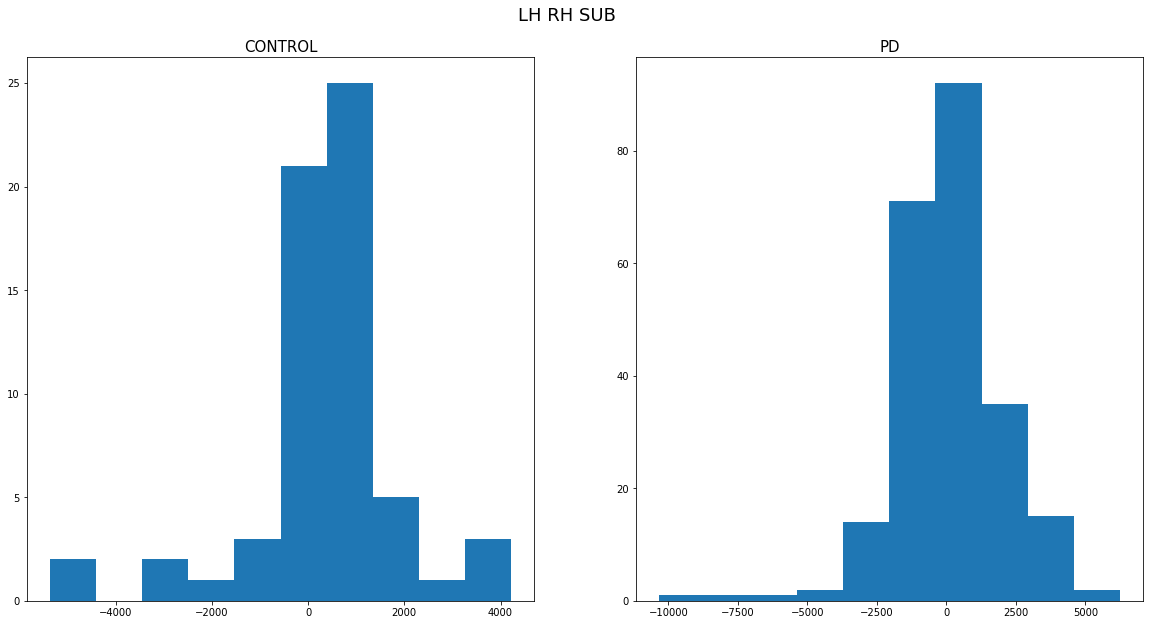

In [46]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].hist(LH_RH_SUB_CONTROL)
ax[0].set_title("CONTROL", fontsize=15)
ax[1].hist(LH_RH_SUB_PD)
ax[1].set_title("PD", fontsize=15)
fig.suptitle("LH RH SUB", fontsize=18, y=0.95)

In [52]:
print("CONTROL", "|mean:", np.mean(LH_RH_SUB_CONTROL), " |std:", np.std(LH_RH_SUB_CONTROL))
print("     PD", "|mean:", np.mean(LH_RH_SUB_PD), "|std:", np.std(LH_RH_SUB_PD))

CONTROL |mean: 360.3548608730155  |std: 1565.5728372941462
     PD |mean: 142.97332588461543 |std: 1830.5223180195273


Text(0.5, 0.95, 'LH RH DIFF SUB')

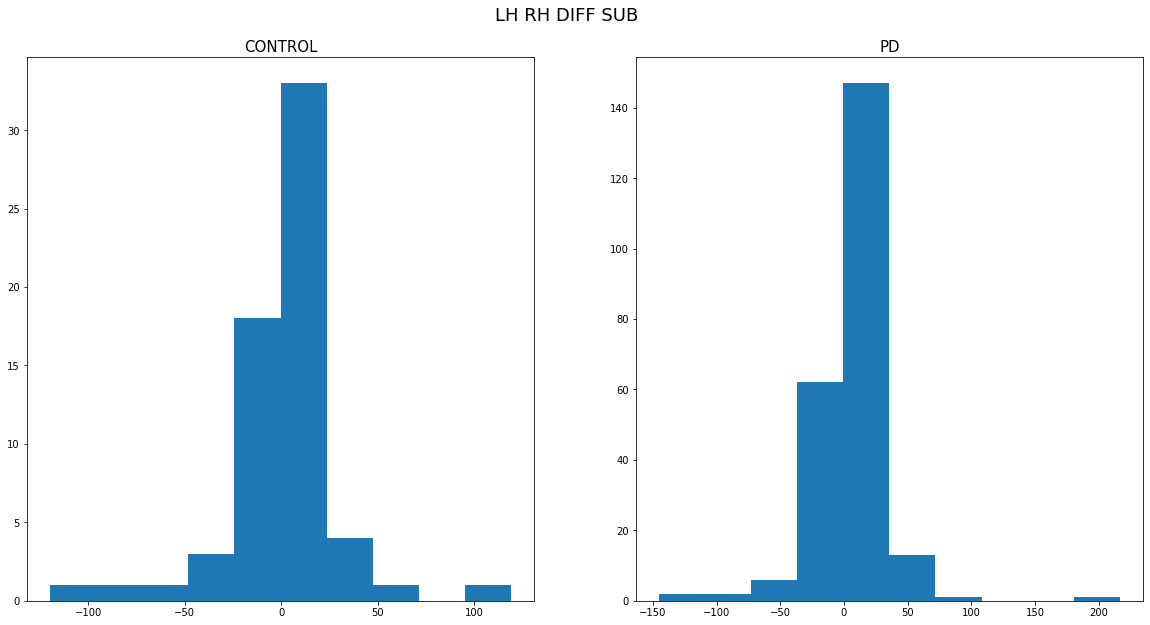

In [47]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].hist(LH_RH_DIFF_SUB_CONTROL)
ax[0].set_title("CONTROL", fontsize=15)
ax[1].hist(LH_RH_DIFF_SUB_PD)
ax[1].set_title("PD", fontsize=15)
fig.suptitle("LH RH DIFF SUB", fontsize=18, y=0.95)

In [55]:
print("CONTROL", "|mean:", np.mean(LH_RH_DIFF_SUB_CONTROL), "|std:", np.std(LH_RH_DIFF_SUB_CONTROL))
print("     PD", "|mean:", np.mean(LH_RH_DIFF_SUB_PD), " |std:", np.std(LH_RH_DIFF_SUB_PD))

CONTROL |mean: -0.0686737936507954 |std: 29.226771145607895
     PD |mean: 3.9423622564102545  |std: 27.75444782036892


---

#### 두 개 같이

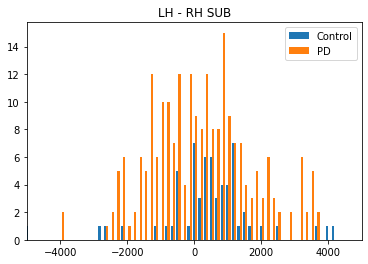

In [78]:
fig, ax = plt.subplots(1,1)
ax.hist([LH_RH_SUB_CONTROL, LH_RH_SUB_PD], label=["Control", "PD"], bins=100)
ax.set_title("LH - RH SUB")
ax.set_xlim(-5000, 5000)
ax.legend()

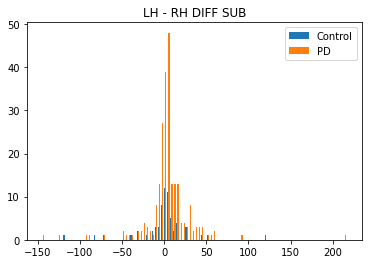

In [79]:
fig, ax = plt.subplots(1,1)
ax.hist([LH_RH_DIFF_SUB_CONTROL, LH_RH_DIFF_SUB_PD], label=["Control", "PD"], bins=100)
ax.set_title("LH - RH DIFF SUB")
ax.legend()